In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

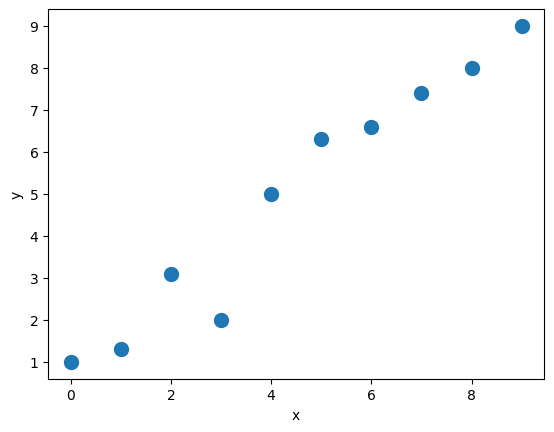

In [2]:
X_train = np.arange(10).reshape((10, 1))
y_train = np.array([1., 1.3, 3.1,
                    2.0, 5.0, 6.3,
                    6.6, 7.4, 8.0,
                    9.0])

plt.plot(X_train, y_train, 'o', markersize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [3]:
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)

ds_train_orig = tf.data.Dataset.from_tensor_slices(
    (tf.cast(X_train_norm, tf.float32),
     tf.cast(y_train, tf.float32))
)

In [4]:
class MyModel(tf.keras.Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.w = tf.Variable(0.0, name='weight')
    self.b = tf.Variable(0.0, name='bias')

  def call(self, x):
    return self.w * x + self.b

In [5]:
model = MyModel()
model.build(input_shape=(None, 1))
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [6]:
def loss_fn(y_true, y_pred):
  return tf.reduce_mean(tf.square(y_true - y_pred))

yt = tf.convert_to_tensor([1.0])
yp = tf.convert_to_tensor([1.5])

loss_fn(yt, yp)

<tf.Tensor: shape=(), dtype=float32, numpy=0.25>

In [7]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as tape:
    current_loss = loss_fn(model(inputs), outputs)
  dW, db = tape.gradient(current_loss, [model.w, model.b])
  model.w.assign_sub(learning_rate * dW)
  model.b.assign_sub(learning_rate * db)

In [8]:
tf.random.set_seed(1)

num_epochs = 200
log_steps = 100
learning_rate = 0.001
batch_size = 1
steps_per_epoch = int(np.ceil(len(y_train) / batch_size))

ds_train = ds_train_orig.shuffle(buffer_size=len(y_train))
ds_train = ds_train.repeat(count=None)
ds_train = ds_train.batch(1)

Ws, bs = [], []

for i, batch in enumerate(ds_train):
  if i >= steps_per_epoch * num_epochs:
    break
  Ws.append(model.w.numpy())
  bs.append(model.b.numpy())

  bx, by = batch
  loss_val = loss_fn(model(bx), by)

  train(model, bx, by, learning_rate=learning_rate)
  if i%log_steps==0:
    print(f"Epoch: {int(i/steps_per_epoch):3d} Step: {i:4d} Loss: {loss_val}")

Epoch:   0 Step:    0 Loss: 43.55999755859375
Epoch:  10 Step:  100 Loss: 0.7530134320259094
Epoch:  20 Step:  200 Loss: 20.175859451293945
Epoch:  30 Step:  300 Loss: 23.397605895996094
Epoch:  40 Step:  400 Loss: 6.348119258880615
Epoch:  50 Step:  500 Loss: 4.635603427886963
Epoch:  60 Step:  600 Loss: 0.24105073511600494
Epoch:  70 Step:  700 Loss: 0.20362770557403564
Epoch:  80 Step:  800 Loss: 3.8176910877227783
Epoch:  90 Step:  900 Loss: 0.9416388869285583
Epoch: 100 Step: 1000 Loss: 0.7034985423088074
Epoch: 110 Step: 1100 Loss: 0.034772761166095734
Epoch: 120 Step: 1200 Loss: 0.5403661131858826
Epoch: 130 Step: 1300 Loss: 0.11702598631381989
Epoch: 140 Step: 1400 Loss: 0.11948295682668686
Epoch: 150 Step: 1500 Loss: 0.09437620639801025
Epoch: 160 Step: 1600 Loss: 0.4670370817184448
Epoch: 170 Step: 1700 Loss: 2.0694775581359863
Epoch: 180 Step: 1800 Loss: 0.001972649712115526
Epoch: 190 Step: 1900 Loss: 0.3612426519393921


Parameters: (2.6576622, 4.8798566)


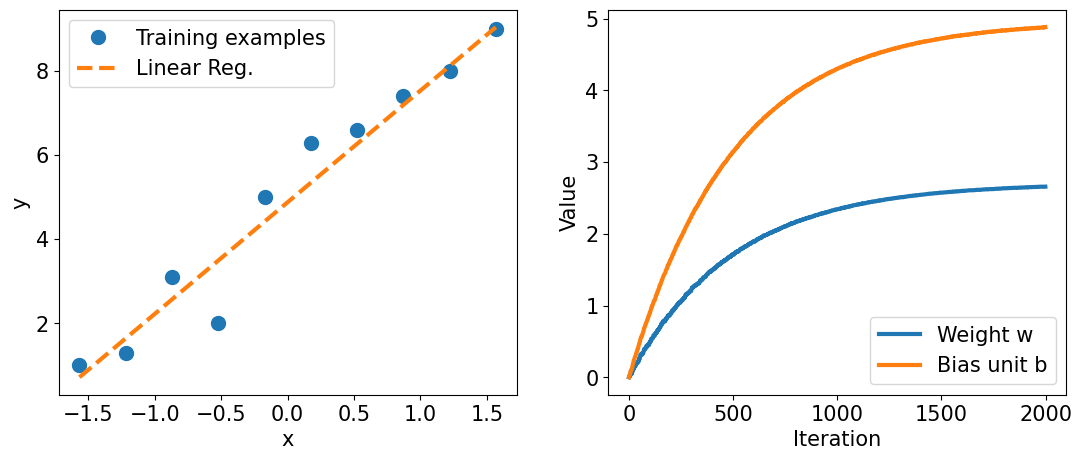

In [9]:
print(f"Parameters: {model.w.numpy(), model.b.numpy()}")

X_test = np.linspace(0, 9, num=100).reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)

y_pred = model(tf.cast(X_test_norm, dtype=tf.float32))

fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training examples', 'Linear Reg.'], fontsize=15)
ax.set_xlabel('x', size=15)
ax.set_ylabel('y', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(Ws, lw=3)
plt.plot(bs, lw=3)
plt.legend(['Weight w', 'Bias unit b'], fontsize=15)
ax.set_xlabel('Iteration', size=15)
ax.set_ylabel('Value', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

plt.show()

In [10]:
tf.random.set_seed(1)

model = MyModel()

model.compile(optimizer='sgd',
              loss=loss_fn,
              metrics=['mae', 'mse'])

model.fit(X_train_norm, y_train,
          epochs=num_epochs, batch_size=batch_size,
          verbose=1)

Epoch 1/200
10/10 [==============================] - 1s 6ms/step - loss: 27.8723 - mae: 4.5654 - mse: 27.8723
Epoch 2/200
10/10 [==============================] - 0s 5ms/step - loss: 18.6586 - mae: 3.7446 - mse: 18.6586
Epoch 3/200
10/10 [==============================] - 0s 4ms/step - loss: 12.5239 - mae: 3.0454 - mse: 12.5239
Epoch 4/200
10/10 [==============================] - 0s 4ms/step - loss: 8.4670 - mae: 2.4907 - mse: 8.4670
Epoch 5/200
10/10 [==============================] - 0s 3ms/step - loss: 5.7632 - mae: 2.0567 - mse: 5.7632
Epoch 6/200
10/10 [==============================] - 0s 3ms/step - loss: 3.9697 - mae: 1.7232 - mse: 3.9697
Epoch 7/200
10/10 [==============================] - 0s 3ms/step - loss: 2.7766 - mae: 1.4752 - mse: 2.7766
Epoch 8/200
10/10 [==============================] - 0s 3ms/step - loss: 1.9861 - mae: 1.2578 - mse: 1.9861
Epoch 9/200
10/10 [==============================] - 0s 3ms/step - loss: 1.4572 - mae: 1.0978 - mse: 1.4572
Epoch 10/200
10/10 [==

2.7067394 4.9657216


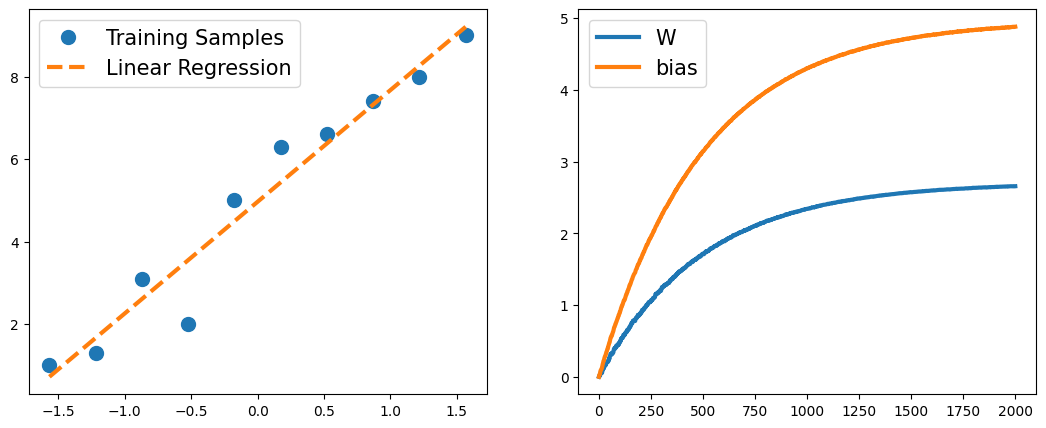

In [11]:
print(model.w.numpy(), model.b.numpy())


X_test = np.linspace(0, 9, num=100).reshape(-1, 1)
X_test_norm = (X_test - np.mean(X_train)) / np.std(X_train)

y_pred = model(tf.cast(X_test_norm, dtype=tf.float32))


fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train_norm, y_train, 'o', markersize=10)
plt.plot(X_test_norm, y_pred, '--', lw=3)
plt.legend(['Training Samples', 'Linear Regression'], fontsize=15)

ax = fig.add_subplot(1, 2, 2)
plt.plot(Ws, lw=3)
plt.plot(bs, lw=3)
plt.legend(['W', 'bias'], fontsize=15)
plt.show()

In [12]:
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [15]:
!pip install --upgrade tfds-nightly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 27.9 MB/s eta 0:00:00


In [16]:
import tensorflow_datasets as tfds

iris, iris_info = tfds.load('iris', with_info=True)

print(iris_info)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/150 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/iris/2.1.0.incomplete83YG7K/iris-train.tfrecord*...:   0%|          | 0/15…

Dataset iris downloaded and prepared to /root/tensorflow_datasets/iris/2.1.0. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='iris',
    full_name='iris/2.1.0',
    description="""
    This is perhaps the best known database to be found in the pattern recognition
    literature. Fisher's paper is a classic in the field and is referenced
    frequently to this day. (See Duda & Hart, for example.) The data set contains
    3 classes of 50 instances each, where each class refers to a type of iris
    plant. One class is linearly separable from the other 2; the latter are NOT
    linearly separable from each other.
    """,
    homepage='https://archive.ics.uci.edu/ml/datasets/iris',
    data_dir=PosixGPath('/tmp/tmpw92zkdgvtfds'),
    file_format=tfrecord,
    download_size=3.65 KiB,
    dataset_size=7.62 KiB,
    features=FeaturesDict({
        'features': Tensor(shape=(4,), dtype=float32),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=3),
    }),

In [21]:
tf.random.set_seed(1)

ds_orig = iris['train']
ds_orig = ds_orig.shuffle(150, reshuffle_each_iteration=False)

print(next(iter(ds_orig)))

ds_train_orig = ds_orig.take(100)
ds_test = ds_orig.skip(100)

{'features': <tf.Tensor: shape=(4,), dtype=float32, numpy=array([6.5, 3. , 5.2, 2. ], dtype=float32)>, 'label': <tf.Tensor: shape=(), dtype=int64, numpy=2>}


In [22]:
n = 0
for example in ds_train_orig:
  n += 1
print(n)

n = 0
for example in ds_test:
  n += 1
print(n)

100
50


In [23]:
ds_train_orig = ds_train_orig.map(
    lambda x: (x['features'], x['label'])
)

ds_test = ds_test.map(
    lambda x: (x['features'], x['label'])
)

next(iter(ds_train_orig))

(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([6.5, 3. , 5.2, 2. ], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=int64, numpy=2>)

In [24]:
iris_model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='sigmoid',
                          name='fc1', input_shape=(4, )),
    tf.keras.layers.Dense(3, name='fc2', activation='softmax')
])
iris_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 16)                80        
                                                                 
 fc2 (Dense)                 (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [25]:
iris_model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

In [26]:
num_epochs = 100
training_size = 100
batch_size = 2
steps_per_epoch = np.ceil(training_size / batch_size)

ds_train = ds_train_orig.shuffle(buffer_size=training_size)
ds_train = ds_train.repeat()
ds_train = ds_train.batch(batch_size=batch_size)
ds_train = ds_train.prefetch(buffer_size=1000)

history = iris_model.fit(ds_train, epochs=num_epochs,
                         steps_per_epoch=steps_per_epoch,
                         verbose=0)

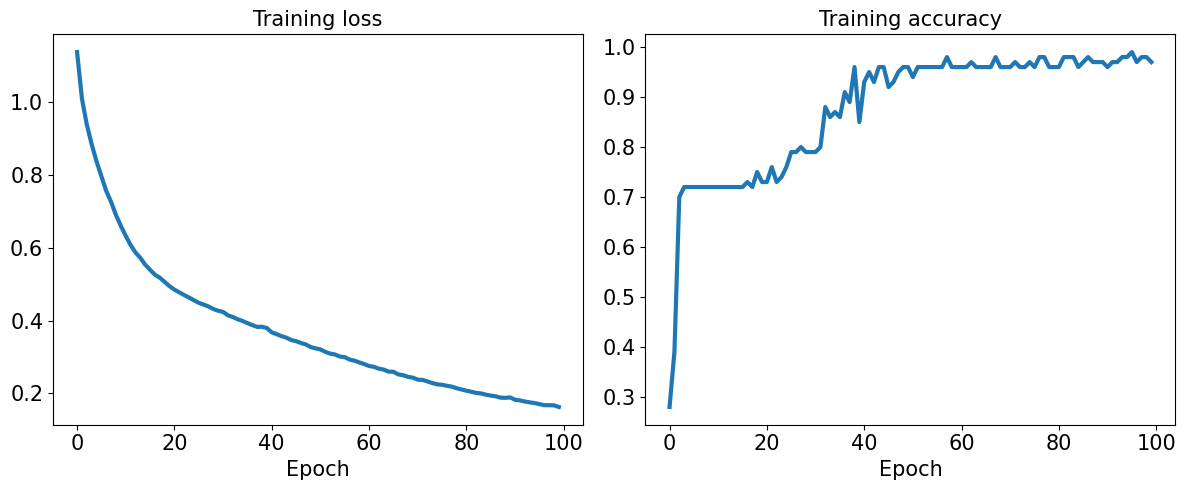

In [27]:
hist = history.history

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=3)
ax.set_title('Training loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=3)
ax.set_title('Training accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
plt.show()

In [28]:
results = iris_model.evaluate(ds_test.batch(50), verbose=0)
print(f"Test loss: {results[0]:.4f} Test accuracy: {results[1]:.4f}")

Test loss: 0.1648 Test accuracy: 0.9800


In [29]:
iris_model.save('iris-classifier.h5',
                overwrite=True,
                include_optimizer=True,
                save_format='h5')

In [30]:
iris_model_new = tf.keras.models.load_model('iris-classifier.h5')
iris_model_new.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 16)                80        
                                                                 
 fc2 (Dense)                 (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [31]:
results = iris_model_new.evaluate(ds_test.batch(50), verbose=0)
print(f"Test loss: {results[0]:.4f} Test accuracy {results[1]:.4f}")

Test loss: 0.1648 Test accuracy 0.9800


In [33]:
labels_train = []
for i, item in enumerate(ds_train_orig):
  labels_train.append(item[1].numpy())

labels_test = []
for i, item in enumerate(ds_test):
  labels_test.append(item[1].numpy())

print(f"Train dataset: {len(labels_train)}, Test dataset: {len(labels_test)}")

Train dataset: 100, Test dataset: 50


In [34]:
iris_model_new.to_json()

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 4], "dtype": "float32", "sparse": false, "ragged": false, "name": "fc1_input"}}, {"class_name": "Dense", "config": {"name": "fc1", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 4], "units": 16, "activation": "sigmoid", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "fc2", "trainable": true, "dtype": "float32", "units": 3, "activation": "softmax", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regu

In [35]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

callback_list = [ModelCheckpoint(filepath='iris-earlystopping.h5',
                                 monitor='val_loss'),
                 EarlyStopping(patience=3, restore_best_weights=True)]

In [36]:
tf.random.set_seed(1)

model = tf.keras.models.model_from_json(iris_model.to_json())
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(ds_train, epochs=500,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=ds_test.batch(50),
                    callbacks=callback_list,
                    verbose=0)

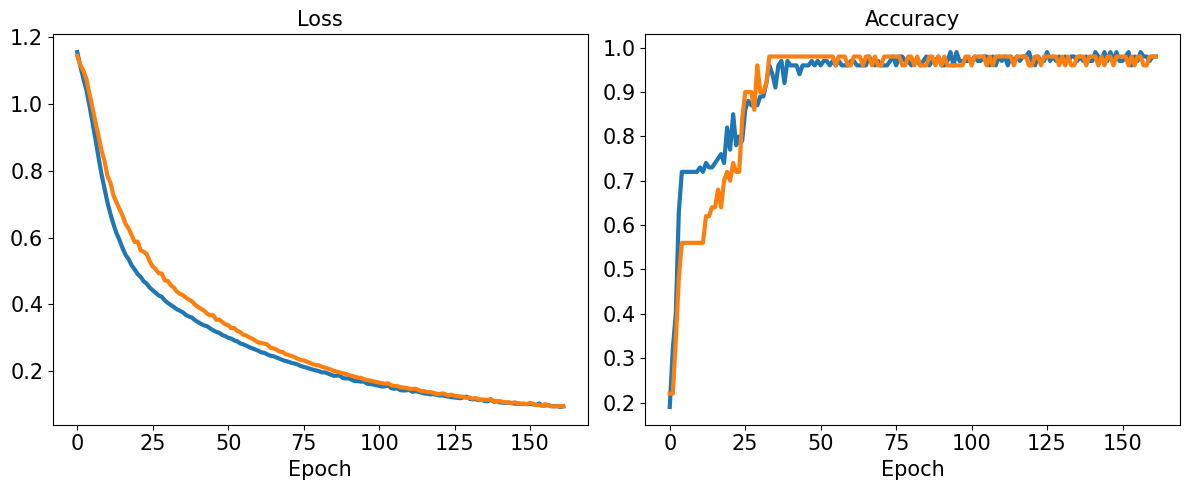

In [37]:
hist = history.history

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw=3)
ax.plot(hist['val_loss'], lw=3)
ax.set_title('Loss', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw=3)
ax.plot(hist['val_accuracy'], lw=3)
ax.set_title('Accuracy', size=15)
ax.set_xlabel('Epoch', size=15)
ax.tick_params(axis='both', which='major', labelsize=15)
plt.tight_layout()
plt.show()

In [38]:
callback_list[1].stopped_epoch

161

In [39]:
from tensorflow.keras.callbacks import TensorBoard

callback_list = [ModelCheckpoint(filepath='iris-earlystopping.h5',
                                 monitor='val_loss'),
                 EarlyStopping(patience=3, restore_best_weights=True),
                 TensorBoard()]

In [40]:
tf.random.set_seed(1)

model = tf.keras.models.model_from_json(iris_model.to_json())
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(ds_train, epochs=500,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=ds_test.batch(50),
                    callbacks=callback_list,
                    verbose=0)

In [41]:
!tensorboard --logdir=logs/

2023-06-11 23:08:00.103127: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.33' not found (required by /usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server)
/usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.34' not found (required by /usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server)
/usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server: /lib/x86_64-linux-gnu/libc.so.6: version `GLIBC_2.32' not found (required by /usr/local/lib/python3.10/dist-packages/tensorboard_data_server/bin/server)
Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.12.2 at http://localhost:6006/ (Press CTRL+C to quit)


In [43]:
# Run at non-secret mode 
%load_ext tensorboard
%tensorboard --logdir loss --port 6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 12413), started 0:00:16 ago. (Use '!kill 12413' to kill it.)

<IPython.core.display.Javascript object>

In [50]:
X = np.array([1, 1.4, 2.5])
w = np.array([0.4, .3, .5])

def net_input(X, w):
  return np.dot(X, w)

def logistic(z):
  return 1./(1. + np.exp(-z))

def logistic_activation(X, w):
  z = net_input(X, w)
  return logistic(z)

print(f"P(y=1|x) = {logistic_activation(X, w):.3f}")

P(y=1|x) = 0.888


In [51]:
# W : (n_output_units, n_hidden_units+1) 크기의 배열
# 첫 번째 열은 절편 유닛입니다

W = np.array([[1.1, 1.2, 0.8, 0.4],
              [0.2, 0.4, 1.0, 0.2],
              [0.6, 1.5, 1.2, 0.7]])

# A : (n_hidden_units + 1, n_samples) 크기의 배열
# 이 배열의 첫 번째 열은 1입니다

A = np.array([[1, 0.1, 0.4, 0.6]])
Z = np.dot(W, A[0])
y_probas = logistic(Z)
print(f"Input: \n {Z}")
print(f"Output: \n {y_probas}")

Input: 
 [1.78 0.76 1.65]
Output: 
 [0.85569687 0.68135373 0.83889105]


In [53]:
y_class = np.argmax(Z, axis=0)
print(f"Predict: {y_class:d}")

Predict: 0


In [54]:
def softmax(z):
  return np.exp(z) / np.sum(np.exp(z))

In [57]:
y_probas = softmax(Z)
print(f"Probabilites: \n{y_probas}")

Probabilites: 
[0.44668973 0.16107406 0.39223621]


In [58]:
np.sum(y_probas)

1.0

In [60]:
Z_tensor = tf.expand_dims(Z, axis=0)
tf.keras.activations.softmax(Z_tensor)

<tf.Tensor: shape=(1, 3), dtype=float64, numpy=array([[0.44668973, 0.16107406, 0.39223621]])>

In [63]:
 import matplotlib.pyplot as plt
 %matplotlib inline

 def tanh(z):
  e_p = np.exp(z)
  e_m = np.exp(-z)

  return(e_p - e_m) / (e_p + e_m)

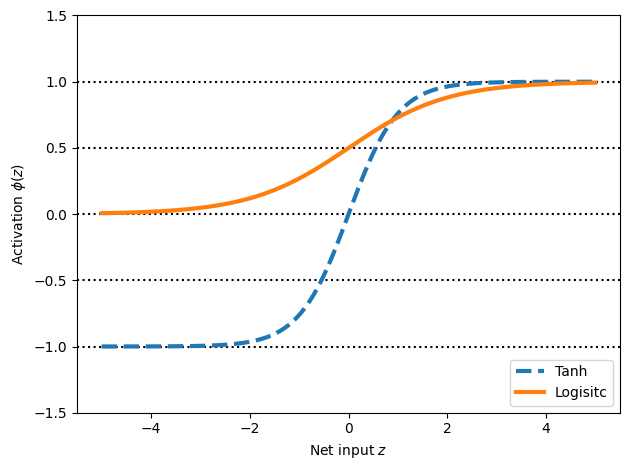

In [65]:
z = np.arange(-5, 5, .005)
log_act = logistic(z)
tanh_act = tanh(z)

plt.ylim([-1.5, 1.5])
plt.xlabel('Net input $z$')
plt.ylabel('Activation $\phi(z)$')
plt.axhline(1, color='black', linestyle=':')
plt.axhline(0.5, color='black', linestyle=':')
plt.axhline(0, color='black', linestyle=':')
plt.axhline(-0.5, color='black', linestyle=':')
plt.axhline(-1, color='black', linestyle=':')

plt.plot(z, tanh_act,
         linewidth=3, linestyle='--',
         label='Tanh')

plt.plot(z, log_act,
         linewidth=3,
         label='Logisitc')

plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [66]:
np.tanh(z)

array([-0.9999092 , -0.99990829, -0.99990737, ...,  0.99990644,
        0.99990737,  0.99990829])

In [67]:
import tensorflow as tf
tf.keras.activations.tanh(z)

<tf.Tensor: shape=(2000,), dtype=float64, numpy=
array([-0.9999092 , -0.99990829, -0.99990737, ...,  0.99990644,
        0.99990737,  0.99990829])>

In [68]:
from scipy.special import expit
expit(z)

array([0.00669285, 0.00672617, 0.00675966, ..., 0.99320669, 0.99324034,
       0.99327383])

In [69]:
tf.keras.activations.sigmoid(z)

<tf.Tensor: shape=(2000,), dtype=float64, numpy=
array([0.00669285, 0.00672617, 0.00675966, ..., 0.99320669, 0.99324034,
       0.99327383])>

In [70]:
import tensorflow as tf
tf.keras.activations.relu(z)

<tf.Tensor: shape=(2000,), dtype=float64, numpy=array([0.   , 0.   , 0.   , ..., 4.985, 4.99 , 4.995])>

https://www.tensorflow.org/api_docs/python/tf/keras/activations

In [73]:
ds = tf.data.Dataset.range(15)
ds

<_RangeDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>

In [74]:
ds = ds.shuffle(15, reshuffle_each_iteration=False)

ds_train = ds.take(10)
ds_test = ds.skip(10)

ds_train = ds_train.shuffle(10).repeat(10)
ds_test = ds_test.shuffle(5)
ds_test = ds_test.repeat(10)

set_train = set()
for i, item in enumerate(ds_train):
  set_train.add(item.numpy())

set_test = set()
for i, item in enumerate(ds_test):
  set_test.add(item.numpy())

print(set_train, '\n', set_test)

{2, 3, 4, 5, 8, 9, 11, 12, 13, 14} 
 {0, 1, 6, 7, 10}


In [75]:
## 잘못된 방법:
ds = tf.data.Dataset.range(15)
ds = ds.shuffle(15, reshuffle_each_iteration=True)


ds_train = ds.take(10)
ds_test = ds.skip(10)

ds_train = ds_train.shuffle(10).repeat(10)
ds_test = ds_test.shuffle(5)
ds_test = ds_test.repeat(10)

set_train = set()
for i,item in enumerate(ds_train):
    set_train.add(item.numpy())

set_test = set()
for i,item in enumerate(ds_test):
    set_test.add(item.numpy())

print(set_train, '\n', set_test)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14} 
 {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14}


In [79]:
ds_train_orig = tfds.load('iris', split='train[:67%]')
ds_test = tfds.load('iris', split='train[67%:]')

print(next(iter(ds_train_orig)))
print()
print(next(iter(ds_test)))

{'features': <tf.Tensor: shape=(4,), dtype=float32, numpy=array([5.1, 3.4, 1.5, 0.2], dtype=float32)>, 'label': <tf.Tensor: shape=(), dtype=int64, numpy=0>}

{'features': <tf.Tensor: shape=(4,), dtype=float32, numpy=array([6.3, 3.4, 5.6, 2.4], dtype=float32)>, 'label': <tf.Tensor: shape=(), dtype=int64, numpy=2>}


In [80]:
ds_train_orig = ds_train_orig.shuffle(100, reshuffle_each_iteration=True)
ds_test  = ds_test.shuffle(50, reshuffle_each_iteration=False)

ds_train_orig = ds_train_orig.map(
    lambda x: (x['features'], x['label']))

ds_test = ds_test.map(
    lambda x: (x['features'], x['label']))

print(next(iter(ds_train_orig)))
print(next(iter(ds_test)))


for j in range(5):
    labels_train = []
    for i,item in enumerate(ds_train_orig):
        labels_train.append(item[1].numpy())

    labels_test = []
    for i,item in enumerate(ds_test):
        labels_test.append(item[1].numpy())
    print('훈련 데이터셋: ',len(labels_train), '테스트 데이터셋: ', len(labels_test))

    labels_test = np.array(labels_test)

    print(np.sum(labels_test == 0), np.sum(labels_test == 1), np.sum(labels_test == 2))

(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([5.1, 3.5, 1.4, 0.2], dtype=float32)>, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([6.4, 2.7, 5.3, 1.9], dtype=float32)>, <tf.Tensor: shape=(), dtype=int64, numpy=2>)
훈련 데이터셋:  100 테스트 데이터셋:  50
15 16 19
훈련 데이터셋:  100 테스트 데이터셋:  50
15 16 19
훈련 데이터셋:  100 테스트 데이터셋:  50
15 16 19
훈련 데이터셋:  100 테스트 데이터셋:  50
15 16 19
훈련 데이터셋:  100 테스트 데이터셋:  50
15 16 19
